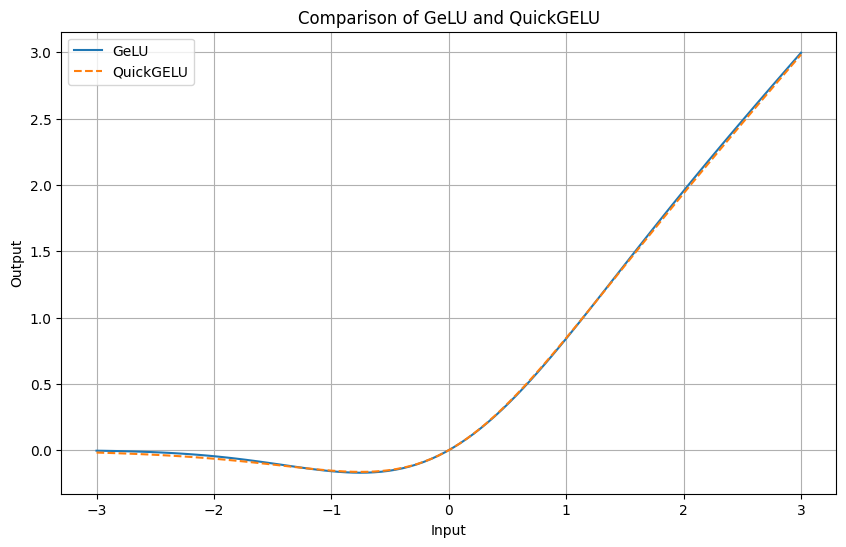

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# 기존 GeLU 함수 정의
def gelu(x):
    return x * 0.5 * (1.0 + torch.erf(x / np.sqrt(2.0)))

# QuickGELU 클래스 정의
class QuickGELU(nn.Module):
    def forward(self, x: torch.Tensor):
        return x * torch.sigmoid(1.702 * x)

# 함수 인스턴스 생성
quick_gelu = QuickGELU()

# 입력 데이터 생성
x = torch.linspace(-3, 3, 100)

# GeLU와 QuickGELU의 출력 계산
y_gelu = gelu(x)
y_quick_gelu = quick_gelu(x)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(x, y_gelu, label='GeLU')
plt.plot(x, y_quick_gelu, label='QuickGELU', linestyle='dashed')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Comparison of GeLU and QuickGELU')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
import time
import numpy as np

# 입력 텐서 크기 설정 (큰 텐서로 계산 속도 비교)
large_input = torch.randn(1000000)

# GeLU 계산 속도 측정
gelu_times = []
for _ in range(1000):
    start_time = time.time()
    _ = gelu(large_input)
    gelu_time = time.time() - start_time
    gelu_times.append(gelu_time)

# QuickGELU 계산 속도 측정
quick_times = []
for _ in range(1000):
    start_time = time.time()
    _ = quick_gelu(large_input)
    quick_gelu_time = time.time() - start_time
    quick_times.append(quick_gelu_time)

print(f'quick gelu가 일반 gelu보다 {np.sum(gelu_times)/np.sum(quick_times):.2f}배 빠릅니다')

quick gelu가 일반 gelu보다 11.95배 빠릅니다


In [13]:
# 입력 텐서 크기 설정 (큰 텐서로 계산 속도 비교)
large_input = torch.randn(1000000)

# GeLU 계산 속도 측정
gelu_times = []
for _ in range(1000):
    start_time = time.time()
    _ = gelu(large_input)
    gelu_time = time.time() - start_time
    gelu_times.append(gelu_time)

# QuickGELU 계산 속도 측정
quick_times = []
for _ in range(1000):
    start_time = time.time()
    _ = quick_gelu(large_input)
    quick_gelu_time = time.time() - start_time
    quick_times.append(quick_gelu_time)

print(f'quick gelu가 일반 gelu보다 {np.sum(gelu_times)/np.sum(quick_times):.2f}배 빠릅니다')

quick gelu가 일반 gelu보다 12.71배 빠릅니다
